<a href="https://colab.research.google.com/github/s14hika/PRODIGY_DS_04/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tweepy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Error: 403 Forbidden
When authenticating requests to the Twitter API v2 endpoints, you must use keys and tokens from a Twitter developer App that is attached to a Project. You can create a project via the developer portal.
Response Headers: {'date': 'Sat, 29 Jun 2024 07:55:18 UTC', 'perf': '7402827104', 'server': 'tsa_o', 'set-cookie': 'guest_id=v1%3A171964771807292456; Max-Age=34214400; Expires=Wed, 30 Jul 2025 07:55:18 GMT; Path=/; Domain=.twitter.com; Secure; SameSite=None', 'api-version': '2.102', 'content-type': 'application/json; charset=utf-8', 'cache-control': 'no-cache, no-store, max-age=0', 'content-length': '328', 'x-access-level': 'read', 'x-frame-options': 'SAMEORIGIN', 'content-encoding': 'gzip', 'x-transaction-id': 'efe4cc85645680c3', 'x-xss-protection': '0', 'x-rate-limit-limit': '40000', 'x-rate-limit-reset': '1719648451', 'content-disposition': 'attachment; filename=json.json', 'x-content-type-options': 'nosniff', 'x-rate-limit-remaining': '39997', 'strict-transport-s

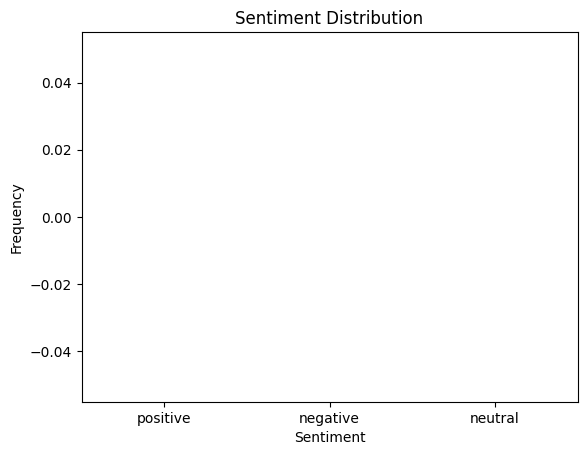

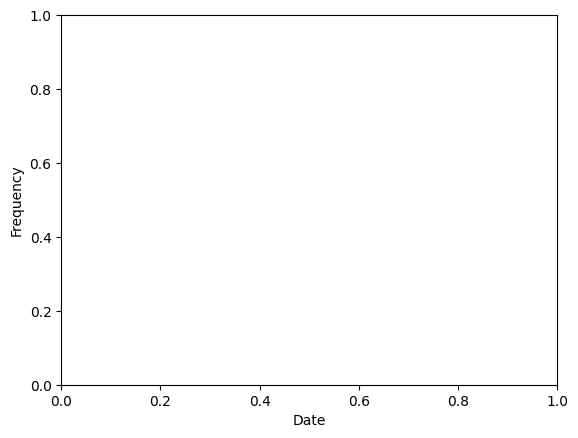

In [7]:
import tweepy
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def collect_tweets(bearer_token, query, count):
    client = tweepy.Client(bearer_token)
    try:
        tweets = client.search_recent_tweets(query=query, max_results=count)
        return tweets.data if tweets.data else []  # Return list of tweets or empty list if no tweets found
    except tweepy.errors.TweepyException as e:
        print("Error:", e)
        print("Response Headers:", e.response.headers)  # Print response headers for debugging
        return []

# Step 2: Data Preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)  # Remove mentions
    tweet = re.sub(r'#', '', tweet)  # Remove hashtag symbol
    tweet = re.sub(r'\d+', '', tweet)  # Remove numbers
    tweet = tweet.lower()  # Convert to lowercase
    tweet = ' '.join(word for word in tweet.split() if word not in stop_words)  # Remove stopwords
    return tweet

# Step 3: Sentiment Analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(tweet):
    scores = sia.polarity_scores(tweet)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Step 4: Visualization
def visualize_sentiments(sentiments):
    sentiment_counts = {
        'positive': sentiments.count('positive'),
        'negative': sentiments.count('negative'),
        'neutral': sentiments.count('neutral')
    }

    sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()))
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.show()

# Step 5: Advanced Visualization (Optional)
def visualize_sentiments_over_time(tweets_df):
    tweets_df['date'] = pd.to_datetime(tweets_df['date']).dt.date
    # Group by date and sentiment, then count occurrences
    sentiment_over_time = tweets_df.groupby(['date', 'sentiment']).size().unstack().fillna(0)

    # Convert sentiment counts to numeric type before plotting
    sentiment_over_time = sentiment_over_time.astype(int)

    # Plot the sentiment distribution over time
    #sentiment_over_time.plot(kind='line', figsize=(14, 7), title='Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Frequency')
    plt.show()

# Main Workflow
if __name__ == "__main__":
    # Twitter API credentials (using Bearer Token for API v2)
    BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAANskugEAAAAA0%2F0a%2FHRMIWShqGxGxCO9PkwkxN8%3DygC1ul40SK3mr0FMROcwEuUhniyKNZsptNSGv3SbFZzsCqaol8'

    # Parameters
    QUERY = "Python"
    TWEET_COUNT = 100  # Reduce tweet count for testing

    # Collect tweets
    tweets = collect_tweets(BEARER_TOKEN, QUERY, TWEET_COUNT)

    # Preprocess tweets
    tweet_data = [tweet.text for tweet in tweets]
    cleaned_tweets = [preprocess_tweet(tweet) for tweet in tweet_data]

    # Analyze sentiment
    sentiments = [analyze_sentiment(tweet) for tweet in cleaned_tweets]

    # Visualization
    visualize_sentiments(sentiments)

    # Advanced Visualization (Optional)
    tweets_df = pd.DataFrame({
        'tweet': tweet_data,
        'sentiment': sentiments,
        'date': [tweet.created_at for tweet in tweets]
    })
    visualize_sentiments_over_time(tweets_df)
